In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install Sastrawi

In [3]:
import pandas as pd
import numpy as np
import nltk
import nltk.corpus
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from sklearn import model_selection, naive_bayes, svm
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/microcredential/data_clean.csv',sep=";")
df.head()

,title,comment,ratings,comment_clean
0,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur mantap harga oke kualitas oke bagus bang...,5,fitur mantap harga oke kualitas oke bagus bang...
1,Masker KN95 Warna WeMask Tali Senada Putih Abu...,bagus tapi pesen warna apa yg dikirim warna ap...,3,bagus pesan warna kirim warna pesan mouson pro...
2,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur masker harga standar kualitas kurang bag...,2,fitur masker harga standar kualitas bagus kant...
3,Masker KN95 Warna WeMask Tali Senada Putih Abu...,barangnya tidak dikirim dan aku lupa rekam vid...,2,barang kirim lupa rekam video unboxing
4,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur buruk harga buruk kualitas buruk beli ...,1,fitur buruk harga buruk kualitas buruk beli ki...


# Labeling
Melabelkan data komentar atau ulasan

In [5]:
label = []
for index, row in df.iterrows():
    if row["ratings"] == 5 or row["ratings"] == 4 or row["ratings"] == 3:
        label.append(1)
    else:
        label.append(0)

df["label"] = label

df

,title,comment,ratings,comment_clean,label
0,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur mantap harga oke kualitas oke bagus bang...,5,fitur mantap harga oke kualitas oke bagus bang...,1
1,Masker KN95 Warna WeMask Tali Senada Putih Abu...,bagus tapi pesen warna apa yg dikirim warna ap...,3,bagus pesan warna kirim warna pesan mouson pro...,1
2,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur masker harga standar kualitas kurang bag...,2,fitur masker harga standar kualitas bagus kant...,0
3,Masker KN95 Warna WeMask Tali Senada Putih Abu...,barangnya tidak dikirim dan aku lupa rekam vid...,2,barang kirim lupa rekam video unboxing,0
4,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur buruk harga buruk kualitas buruk beli ...,1,fitur buruk harga buruk kualitas buruk beli ki...,0
...,...,...,...,...,...
820,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,bahan lebih tipis dari yg sebelumnua kualitas ...,3,bahan tipis sebelumnua kualitas rendah harga j...,1
821,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,bahan kurang bagus baru dipakai brudul gitu jd...,3,bahan bagus pakai brudul gate kualitas harga l...,1
822,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,bahan biasa aja kualitas biasa ini pesenan ke ...,2,bahan kualitas pesan beda eh parah sih bungkus...,0
823,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,kualitas kaya bekas di bungkus kantong keresek...,1,kualitas kayak bekas bungkus kantong keresek p...,0


In [6]:
df = df.rename(columns={'comment_clean': 'review_text','label': 'category'})
df

,title,comment,ratings,review_text,category
0,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur mantap harga oke kualitas oke bagus bang...,5,fitur mantap harga oke kualitas oke bagus bang...,1
1,Masker KN95 Warna WeMask Tali Senada Putih Abu...,bagus tapi pesen warna apa yg dikirim warna ap...,3,bagus pesan warna kirim warna pesan mouson pro...,1
2,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur masker harga standar kualitas kurang bag...,2,fitur masker harga standar kualitas bagus kant...,0
3,Masker KN95 Warna WeMask Tali Senada Putih Abu...,barangnya tidak dikirim dan aku lupa rekam vid...,2,barang kirim lupa rekam video unboxing,0
4,Masker KN95 Warna WeMask Tali Senada Putih Abu...,fitur buruk harga buruk kualitas buruk beli ...,1,fitur buruk harga buruk kualitas buruk beli ki...,0
...,...,...,...,...,...
820,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,bahan lebih tipis dari yg sebelumnua kualitas ...,3,bahan tipis sebelumnua kualitas rendah harga j...,1
821,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,bahan kurang bagus baru dipakai brudul gitu jd...,3,bahan bagus pakai brudul gate kualitas harga l...,1
822,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,bahan biasa aja kualitas biasa ini pesenan ke ...,2,bahan kualitas pesan beda eh parah sih bungkus...,0
823,MASKER KN95 / MASKER KN 95 / DISPOSABLE MASK 5...,kualitas kaya bekas di bungkus kantong keresek...,1,kualitas kayak bekas bungkus kantong keresek p...,0


# Split Data Train dan Testing dengan TF-IDF
Sebelum kita modelkan data yang sudah di labelkan, terlebih dahulu membagi data yang ingin di latih (train) dan di uji (test) disini kami menggunakan test_size sebesar 0.1 dan data training sebesar 0.9

TF-IDF adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat. Metode ini akan menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review_text'], df['category'], 
                                                    test_size=0.1, stratify=df['category'], random_state=30)

In [8]:
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [9]:
X_train = vectorizer.fit_transform(X_train.values.astype('U'))
X_test = vectorizer.transform(X_test.values.astype('U'))
print(X_train.shape)
print(X_test.shape)

(742, 1718)
(83, 1718)


In [10]:
X_train = X_train.toarray()

In [11]:
X_test = X_test.toarray()

# Model

In [13]:
# Classifier - Algorithm - SVM
import numpy
import pandas
import pickle
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.utils import np_utils
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(SVM,open('SVM.pkl','wb'))
model = pickle.load(open('SVM.pkl','rb'))

predictions_SVM = model.predict(X_test)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)
print(predictions_SVM)

SVM Accuracy Score ->  80.72289156626506
[0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0
 1 1 1 1 1 1 1 0 1]


# Metric
Evaluasi model yang dilakukan untuk melihat performance dari model tersebut, disini kami melihat akurasi dari model tersebut seberapa besar dia berhasil memprediksi, serta menggunakan confusion matrix untuk melihat berapa yang benar mengklasifikasikan datanya

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.81      0.88      0.85        50

    accuracy                           0.81        83
   macro avg       0.80      0.79      0.79        83
weighted avg       0.81      0.81      0.80        83



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predictions_SVM)
cf

array([[23, 10],
       [ 6, 44]])

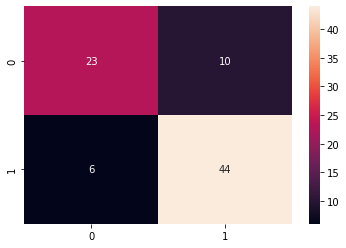

In [ ]:
sns.heatmap(cf,annot=True)

Terlihat dari hasil metric di atas menunjukkan model SVM mampu mengklasifikasikan dengan akurasi sebesar 81% dan ditunjukkan dengan confusion matrix yang didapatkan dengan prediksi label 0 (Negatif) yang cukup baik dan 1 (Positif) yang cukup baik